# Hotel Booking System & Database Pipeline

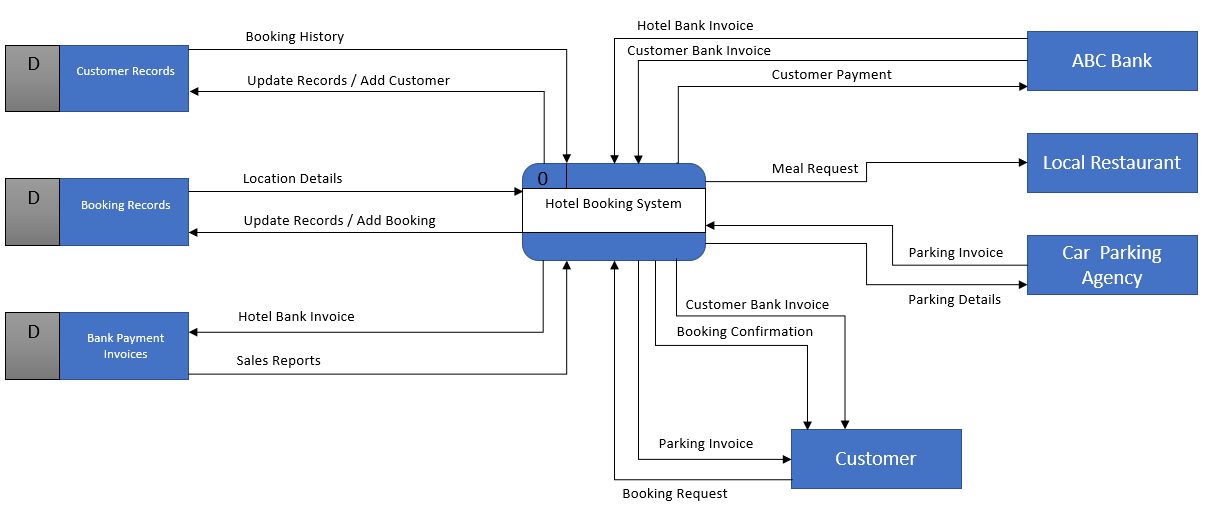
Level 0 Context Diagram


Level 1 DFD


Level 2 DFD

## Analysing the Dataset

In [1]:
import pandas as pd
data = pd.read_csv('Hotel Booking Dataset.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2571 entries, 0 to 2570
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   hotel                           2571 non-null   object
 1   is_canceled                     2571 non-null   int64 
 2   lead_time                       2571 non-null   int64 
 3   arrival_date_year               2571 non-null   int64 
 4   arrival_date_month              2571 non-null   object
 5   arrival_date_day_of_month       2571 non-null   int64 
 6   stays_in_weekend_nights         2571 non-null   int64 
 7   stays_in_week_nights            2571 non-null   int64 
 8   adults                          2571 non-null   int64 
 9   children                        2571 non-null   int64 
 10  babies                          2571 non-null   int64 
 11  meal                            2571 non-null   object
 12  country                         2570 non-null   

By default, the dataset comes in the First Normal form consiting of unique columns. However, the reason it is not in 2NF is because it has not got a primary key in multiple different tables. The first task to normalise the data would be to seperate the columns into relevant tables such as a customers and booking table. 

The case scenario specifies the requirement of a customer details and booking records database to be implemented but others may also be introduced when splitting to 2NF. For the database integration, I will be using SQLAlchemy paired with Get and Set funtions which I plan to create to easily access the data in each table.

In [2]:
import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy.types import Integer, Text, String, DateTime, Float
engine = create_engine('sqlite:///Hotel Database.db')

## Splitting The Dataset

Using the Data relationship model as a template for the tables, this takes the data from 1NF to a partial 2NF. This 2NF will be fully achieved when the auto-indexing ID is made when sending it to the Database.

In [3]:
# Filtering the dataset into Normalised tables
customer_records = data.filter([
    'customer_id',    # Creating the ID column here for index
    'customer_type',
    'is_repeated_guest',
    'previous_cancellations',
    'previous_bookings_not_canceled'
])

booking_records = data.filter([
    'booking_id',    # Creating the ID column here for index
    'hotel',
    'adults',
    'children',
    'babies',
    'reservation_status'
])

room_records = data.filter([
    'room_id',
    'customer_id',
    'reserved_room_type',
    'assigned_room_type'
])

booking_agents = data.filter([
    'agent_id',
    'Booking Agent'
])

payment_records = data.filter([
    'payment_id',
    'agent_id',
    'deposit_type'
])

arrival_records = data.filter([
    'arrival_id',
    'arrival_date_year',
    'arrival_date_month',
    'arrival_date_day_of_month'
    'required_car_parking_spaces'
])

# Data Types
customer_records_dtypes = {
    'customer_type' : String,
    'is_repeated_guest' : Integer,
    'previous_cancellations' : Integer,
    'previous_bookings_not_canceled' : Integer
}

booking_records_dtypes = {
    'booking_id' : Integer,   # Creating the ID column here for index
    'hotel' : String,
    'adults' : Integer,
    'children' : Integer,
    'babies' : Integer,
    'reservation_status' : String,
}

room_records_dtypes = {
    'room_id' : Integer,
    'customer_id' : Integer,
    'reserved_room_type' : String,
    'assigned_room_type' : String,
}

payment_records_dtype = {
    'payment_id' : Integer,
    'agent_id' : Integer,
    'deposit_type' : String 
    }

arrival_records_dtypes = { 
    'arrival_id' : Integer,
    'arrival_date_year' : Integer,
    'arrival_date_month' : String,
    'arrival_date_day_of_month' : Integer,
    'required_car_parking_spaces' : Integer,
}

## Initialising The Tables

In [7]:
def create_sql_table(dataframe : pd.DataFrame, index_name : str, table_name : str, engine : sqlalchemy.engine, data_types : dict):
    dataframe.index.name = index_name
    dataframe.to_sql(
        table_name,
        engine,
        if_exists='replace',
        index= True,
        chunksize=500,
        dtype=data_types
    )

In [8]:
create_sql_table(customer_records, "customer_id", "Customer Records", engine, customer_records_dtypes)
create_sql_table(booking_records, "booking_id", "Booking Records", engine, booking_records_dtypes)
create_sql_table(room_records, "room_id", "Room Records", engine, room_records_dtypes)
create_sql_table(payment_records, "payment_id", "Payment Records", engine, payment_records_dtype)
create_sql_table(arrival_records, "arrival_id", "Arrival Records", engine, arrival_records_dtypes)

In [9]:
def get_sql_table(table_name : str, engine : sqlalchemy.engine) -> pd.DataFrame:
    df = pd.read_sql_table(table_name, con=engine)
    return df

def set_sql_table(dataframe : pd.DataFrame, table_name : str, engine : sqlalchemy.engine, data_types : dict) -> None:
    dataframe.to_sql(
        table_name,
        engine,
        if_exists='append',
        index= False,
        chunksize=500,
        dtype=data_types
    )

from sqlalchemy import insert

class Booking:

    __table_name = "Booking Records"

    def __init__(self, 
    hotel : str,
    booking_agent : str,
    reserved_room_type : str,
    assigned_room_type : str,
    deposit_type : str,
    arrival_date_year : int,
    arrival_date_month : str,
    arrival_date_day_of_month : int,
    adults : int,
    children : int,
    babies : int,
    required_car_parking_spaces : int,
    reservation_status : str):
        self.hotel = hotel
        self.booking_agent = booking_agent
        self.reserved_room_type = reserved_room_type
        self.assigned_room_type = assigned_room_type
        self.deposit_type = deposit_type
        self.arrival_date_year = arrival_date_year
        self.arrival_date_month = arrival_date_month
        self.arrival_date_day_of_month = arrival_date_day_of_month
        self.adults = adults
        self.children = children
        self.babies = babies
        self.required_car_parking_spaces = required_car_parking_spaces
        self.reservation_status = reservation_status

    #def Add_Booking(self):
       # stmt = insert(self.__table_name).values(hotel = self.hotel)

        

In [10]:
#table_df = pd.read_sql_table(table_name, con=engine)

In [11]:
#from tkinter import *
#from tkinter import ttk
#root = Tk()
#frm = ttk.Frame(root, padding=10)
#frm.grid()
#ttk.Label(frm, text="Hello World!").grid(column=0, row=0)
#ttk.Button(frm, text="Quit", command=root.destroy).grid(column=1, row=0)
#root.mainloop()
